# Simulating the Modulation Curve Numerically

The next equation is going to be simulated:

$$I_k (x,y) = exp(\lambda_k)*[a_0(x,y)+a_1(x,y)*cos(\frac{2\pi k}{M}+\Phi(x,y) + step\_error_k)]+\eta_k(x,y)$$

Where $I(x,y)$ is the intensity in each $(x,y)$ pixel, $\lambda$ is the mean value of a normal distribution to simulate the Dose Fluctuations between each acquisition. The $step\_error$ simulates errors in the phase step estimation and $\eta$ the noise. The parameters related to the Differential Phase Contrast (DPC) and Attenuation or Transmission (T) images are $a_0(x,y)$, $a_1(x,y)$ and $\Phi(x,y)$. 

First it is needed to define the object we want to simulate, there are only simple objects like a sphere or a cylinder.

Fresnel number: 290.3595944686271.


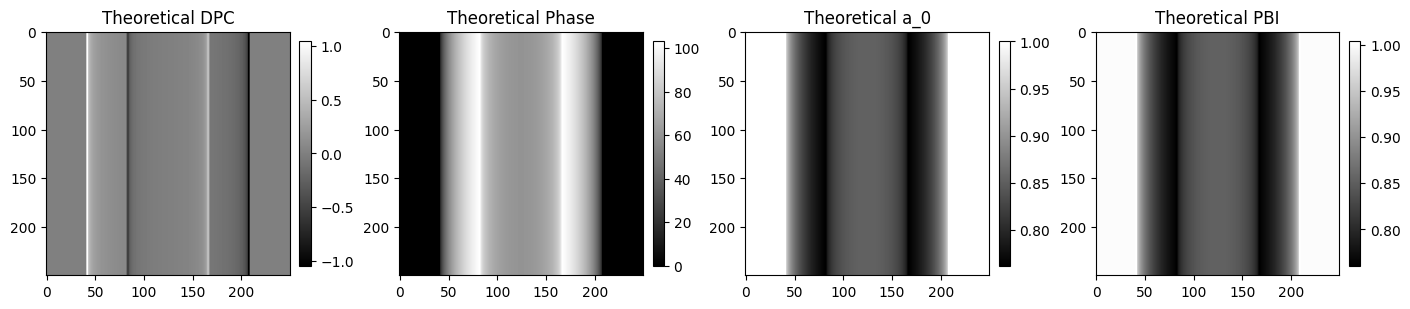

0.762489796917352


In [6]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))

import numpy as np
import matplotlib.pyplot as plt
import src.Simple_Numerical_Simulation.Objects as obj
import imageio
from skimage import io
import src.Simple_Numerical_Simulation.simulation as sim

n = 250
radius = 1000 # um
#pixel_size = 12 #um
pixel_size = 12 #um
energy = 20 # keV
wavelength = 1.23984193/(energy*1000) #um
delta = 5.91768412E-07  
beta = 3.887903103724371341E-10*2
imag_factor = 2*np.pi*beta/wavelength
real_factor = 2*np.pi*delta/wavelength

Object = obj.Cylinder(n, radius, pixel_size, real_factor, imag_factor,Orientation='Vertical', inner_radius=500)
#Object = obj.Sphere(n, radius, pixel_size, real_factor, imag_factor)

#Object = obj.Wedge(n, width=10000,thickness=10000, pixel_size=pixel_size, delta=delta,beta=beta)


PG = Object.Obtain_Phase_Gradient(axis = 1)
Lp = Object.Obtain_Phase_Laplacian()
Phase = Object.Obtain_Phase_Distribuction()
a0 = Object.a0_Distribution()
PBI_theor = Object.PBI_Theoretical_near_field(distance = 0.8, energy = energy, M = 1) #distance in cm
projection = Object.Obtain_projection()

#imageio.imwrite('Simulation/Phase.tif', Phase)

fig, ax = plt.subplots(1, 4, constrained_layout = True, figsize = (14, 14))
#fig.tight_layout()

DPC = ax[0].imshow(PG,  'gray')
ax[0].title.set_text('Theoretical DPC')
fig.colorbar(DPC, ax = ax[0], fraction=0.046, pad=0.04)

P = ax[1].imshow(Phase,  'gray')
ax[1].title.set_text('Theoretical Phase')
fig.colorbar(P, ax = ax[1], fraction=0.046, pad=0.04)

A0 = ax[2].imshow(a0,  'gray')
ax[2].title.set_text('Theoretical a_0')
fig.colorbar(A0, ax = ax[2], fraction=0.046, pad=0.04)

PBI_THEOR = ax[3].imshow(PBI_theor,  'gray')
ax[3].title.set_text('Theoretical PBI')
fig.colorbar(PBI_THEOR, ax = ax[3], fraction=0.046, pad=0.04)
plt.show()

print(np.min(a0))

Save Results


In [2]:
# Save as Tif
from PIL import Image
image_1 = Image.fromarray(PG)
image_1.save('Results/PG_theor.tif')
image_2 = Image.fromarray(PBI_theor)
image_2.save('Results/PBI_theor.tif')
image_3 = Image.fromarray(Phase)
image_3.save('Results/Phase_theor.tif')

# Plot Profiles

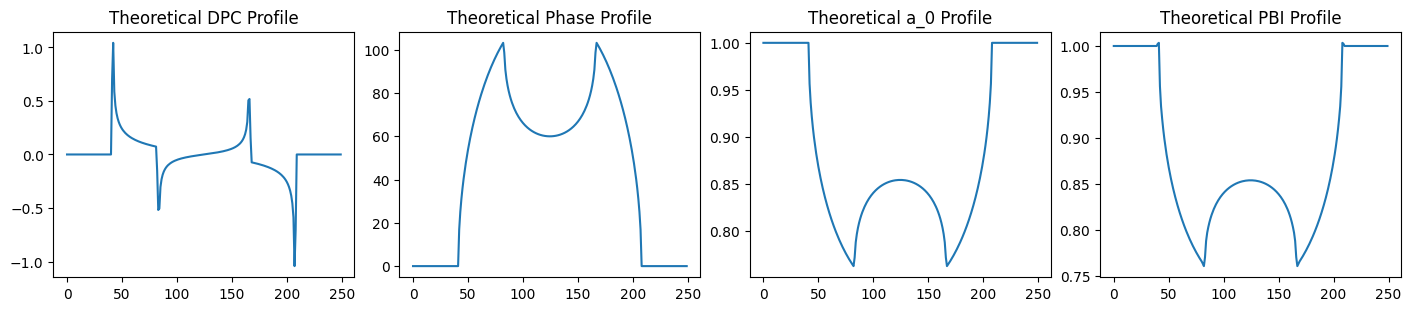

In [5]:
fig, ax = plt.subplots(1, 4, constrained_layout = True, figsize = (14, 3))
DPC_Profile = ax[0].plot(PG[n//2,:])
ax[0].title.set_text('Theoretical DPC Profile')

P_Profile = ax[1].plot(Phase[n//2, :])
ax[1].title.set_text('Theoretical Phase Profile')

A0_Profile =ax[2].plot(a0[n//2, :])
ax[2].title.set_text('Theoretical a_0 Profile')

PBI_THEOR_Profile =ax[3].plot(PBI_theor[n//2, :])
ax[3].title.set_text('Theoretical PBI Profile')
plt.show()

# Calculate Modulation Curves with Moiré pattern

Using Eq:
$$I_k (x,y) = exp(\lambda_k)*[a_0(x,y)+a_1(x,y)*cos(\frac{2\pi k}{M}+\Phi(x,y) + step\_error_k)]+\eta_k(x,y)$$ 

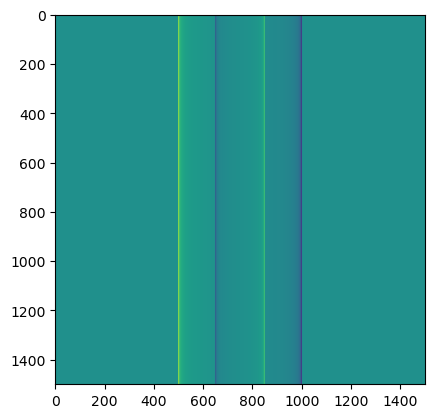

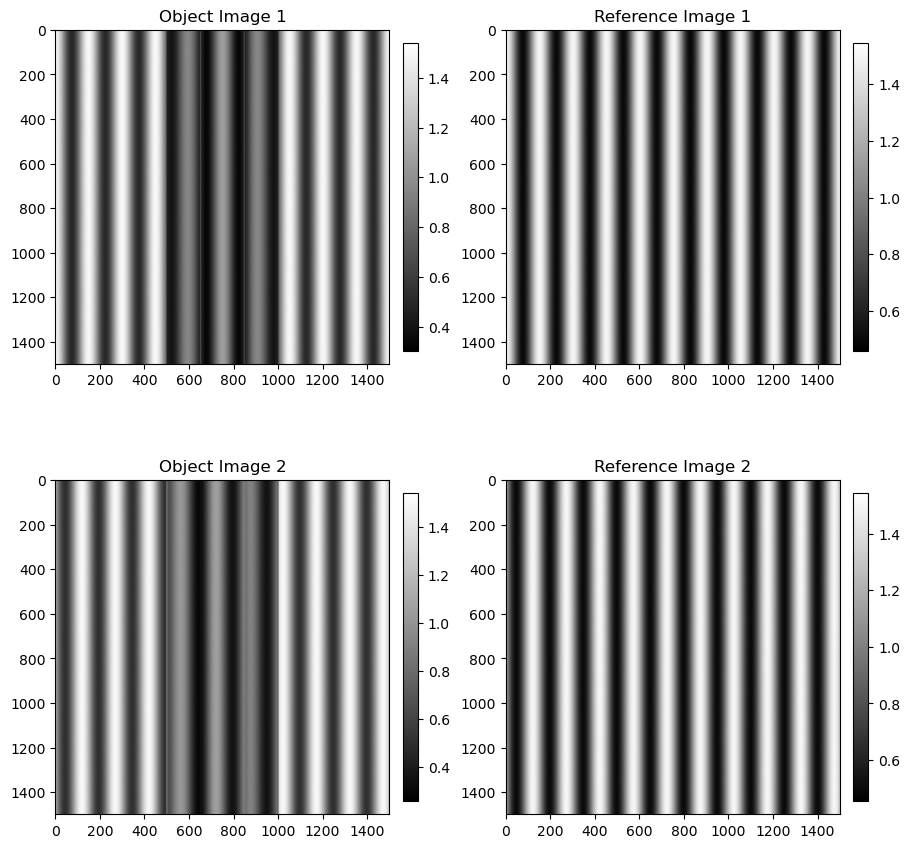

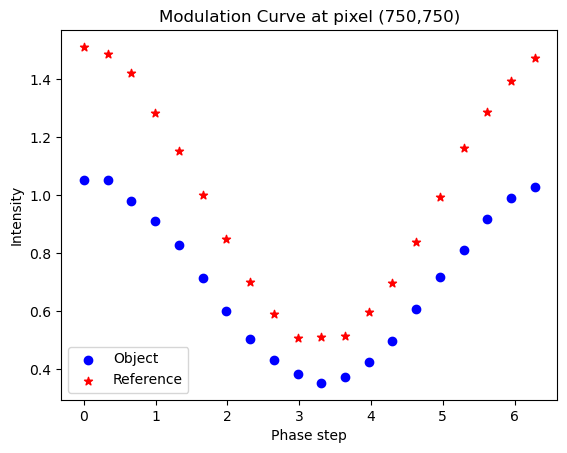

In [4]:
noise_mean = 0.01
error_steps_mean = 0.0
error_dose_mean = 0.0
Moire = True
Phase_steps = 20
Images, Images_reference = sim.Simulation(Object, Phase_steps, noise_mean, error_steps_mean, error_dose_mean, Moire)
Images = np.asarray(Images)
Images_reference = np.asarray(Images_reference)

from PIL import Image
image = Image.fromarray(Images[0,:,:])

fig, ax = plt.subplots(2, 2, constrained_layout = True, figsize = (9, 9))
#fig.tight_layout()

Imag1 = ax[0,0].imshow(Images[0,:,:],  'gray')
ax[0,0].title.set_text('Object Image 1')
fig.colorbar(Imag1, ax = ax[0,0], fraction=0.046, pad=0.04)

RefImage1 = ax[0,1].imshow(Images_reference[0,:,:],  'gray')
ax[0,1].title.set_text('Reference Image 1')
fig.colorbar(RefImage1, ax = ax[0,1], fraction=0.046, pad=0.04)

Imag2 = ax[1,0].imshow(Images[4,:,:],  'gray')
ax[1,0].title.set_text('Object Image 2')
fig.colorbar(Imag2, ax = ax[1,0], fraction=0.046, pad=0.04)

RefImage2 = ax[1,1].imshow(Images_reference[4,:,:],  'gray')
ax[1,1].title.set_text('Reference Image 2')
fig.colorbar(RefImage2, ax = ax[1,1], fraction=0.046, pad=0.04)
plt.show()

plt.scatter(np.linspace(0,2*np.pi, Phase_steps), Images[:,n//2, n//2],color= "blue",marker= "o", label = 'Object')
plt.scatter(np.linspace(0,2*np.pi, Phase_steps), Images_reference[:,n//2, n//2], color= "red",marker= "*", label = 'Reference')
plt.legend(loc='best')
plt.xlabel('Phase step')
plt.ylabel('Intensity')
plt.title(f'Modulation Curve at pixel ({n//2},{n//2})')
plt.show()
#fig.savefig('Modulation_Curve.png')

We can save the results into the **Simulation** folder or modifying the path, wherever you want.

In [5]:
filename_object_images = 'Object_images'
filename_reference_images = 'Reference_images'
imageio.volwrite('Results/'+str(filename_object_images)+'.tif', Images)
imageio.volwrite('Results/'+str(filename_reference_images)+'.tif', Images_reference)